# Imports

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import io
import requests

# Constants

In [4]:
HEIGHT_AND_WEIGHT_SELF_REPORT_CSV_URL = "https://vincentarelbundock.github.io/Rdatasets/csv/car/Davis.csv"

WEIGHT_COL = "weight"
HEIGHT_COL = "height"
FEATURES_COL = [WEIGHT_COL]
TARGET_COL = HEIGHT_COL

TEST_AMOUNT = 20
MAX_STEPS = 2000

# Loading data

In [5]:
raw_csv_str = requests.get(HEIGHT_AND_WEIGHT_SELF_REPORT_CSV_URL).content
height_and_weight_df = pd.read_csv(io.StringIO(raw_csv_str.decode('utf-8')))

# Filterring input data

In [6]:
height_and_weight_df_filtered = height_and_weight_df[height_and_weight_df[WEIGHT_COL] < 115]

# Function that converts input data to the Tensor

In [7]:
def prepare_input():
  return {k: tf.constant(height_and_weight_df_filtered[k].values[:-TEST_AMOUNT]) for k in FEATURES_COL}, tf.constant(height_and_weight_df_filtered[TARGET_COL].values[:-TEST_AMOUNT])

def prepare_test_input():
  return {k: tf.constant(height_and_weight_df_filtered[k].values[-TEST_AMOUNT:]) for k in FEATURES_COL}, tf.constant(height_and_weight_df_filtered[TARGET_COL].values[-TEST_AMOUNT:])

def prepare_full_input():
  return {k: tf.constant(height_and_weight_df_filtered[k].values) for k in FEATURES_COL}, tf.constant(height_and_weight_df_filtered[TARGET_COL].values)

def predict_input():
  input, _ = prepare_input()
  return input

def input_const(c, col_name):
  return lambda: {col_name: tf.constant([c])}

# Creating base continuos features

In [8]:
features = [tf.contrib.layers.real_valued_column(feature_name) for feature_name in FEATURES_COL]

# Building the model 

In [9]:
linear_regressor = tf.contrib.learn.LinearRegressor(feature_columns=features)
linear_regressor.fit(input_fn=prepare_input, max_steps=MAX_STEPS)

Explicitly set `enable_centered_bias` to 'True' if you want to keep existing behaviour.
Instructions for updating:
Please use tf.contrib.framework.load_variable instead


LinearRegressor()

# Plotting of updated results

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


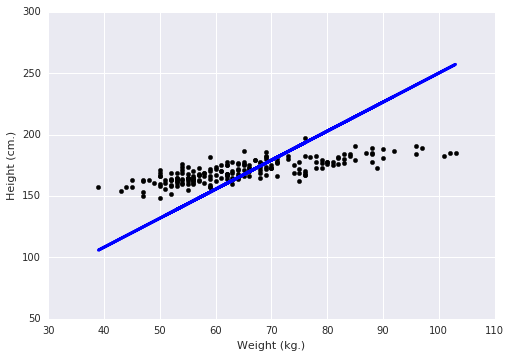

In [10]:
fig, ax = plt.subplots()
plt.scatter(height_and_weight_df_filtered[WEIGHT_COL], height_and_weight_df_filtered[HEIGHT_COL], color='black')
plt.plot(height_and_weight_df_filtered[WEIGHT_COL], linear_regressor.predict(input_fn=prepare_full_input), color='blue',
         linewidth=3)
ax.set_xlabel('Weight (kg.)')
ax.set_ylabel('Height (cm.)')
plt.show()

In [12]:
linear_regressor.evaluate(input_fn=prepare_test_input, steps=MAX_STEPS)

{'global_step': 2000, 'loss': 690.12439}

In [43]:
linear_regressor.get_variable_names()

['centered_bias_weight',
 'centered_bias_weight/Adagrad',
 'global_step',
 'linear/bias_weight',
 'linear/bias_weight/Ftrl',
 'linear/bias_weight/Ftrl_1',
 'linear/weight/weight',
 'linear/weight/weight/Ftrl',
 'linear/weight/weight/Ftrl_1']

In [62]:
linear_regressor.get_variable_value('linear/bias_weight')

array([ 8.72012043], dtype=float32)

In [67]:
linear_regressor.get_variable_value('linear/bias_weight/Ftrl_1')

array([-34972.34375], dtype=float32)

In [48]:
linear_regressor.get_variable_value('linear/weight/weight')

array([[ 2.34453583]], dtype=float32)

In [58]:
linear_regressor.predict(input_fn=input_const(30, WEIGHT_COL))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


array([ 84.07122803], dtype=float32)

In [59]:
a = linear_regressor.get_variable_value('linear/weight/weight')
b = linear_regressor.get_variable_value('linear/bias_weight')

def predict(x):
  return a * x + b

In [60]:
predict(30)

array([[ 75.35110474]], dtype=float32)